## IMPORT_LIBRARIES 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set()

## Import_Data 

In [2]:
df=pd.read_csv("chatgpt.csv")

# Read_Data

In [3]:
df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN


In [4]:
df.tail()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
219289,1609338385864478720,2022-12-31 23:59:05+00:00,0,0,0,0,Other Software Projects Are Now Trying to Repl...,NaN,NaN,NaN,NaN
219290,1609338488293363712,2022-12-31 23:59:30+00:00,5,0,1,1,I asked #ChatGPT to write a #NYE Joke for SEOs...,NaN,NaN,NaN,NaN
219291,1609338538226757632,2022-12-31 23:59:42+00:00,7,0,0,0,chatgpt is being disassembled until it can onl...,NaN,NaN,NaN,NaN
219292,1609338573056245761,2022-12-31 23:59:50+00:00,3,0,1,0,2023 predictions by #chatGPT. Nothing really s...,NaN,https://pbs.twimg.com/media/FlWE3GKXoAAg-ac.jpg,NaN,NaN
219293,1609338601955000320,2022-12-31 23:59:57+00:00,0,0,0,0,"From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0",NaN,https://pbs.twimg.com/media/FlWE7RQaYAABU6o.jpg,NaN,NaN


# Data_Clean

In [5]:
df.columns

Index(['tweet_id', 'created_at', 'like_count', 'quote_count', 'reply_count',
       'retweet_count', 'tweet', 'country', 'photo_url', 'city',
       'country_code'],
      dtype='object')

In [6]:
df.drop(["country"],axis=1,inplace=True)

In [7]:
df.drop(["photo_url"],axis=1,inplace=True)

In [8]:
df.drop(["city"],axis=1,inplace=True)

In [9]:
df.drop(["country_code"],axis=1,inplace=True)

In [10]:
df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh..."
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ..."
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne..."


In [11]:
df.duplicated().sum()

0

In [12]:
mask1=df.isnull().any(axis=0)


In [13]:
mask1.sum()

0

In [14]:
mask2=df.isnull().any(axis=1)

In [15]:
mask2.sum()

0

# Explore_Outliries

In [16]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)

tweet_id
like_count
quote_count
reply_count


In [17]:
q1 = df[col_name].quantile(0.25)
q1

0.0

In [18]:
q3 = df[col_name].quantile(0.75)
q3

1.0

In [19]:
iqr = q3 - q1
iqr

1.0

In [20]:
low = q1-1.5*iqr
low

-1.5

In [21]:
high = q3+1.5*iqr
high

2.5

In [22]:
print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])
    

Outliers =  1         1130
3           25
5           85
9            6
13           4
          ... 
219220       3
219221       5
219272       3
219276       8
219277       5
Name: reply_count, Length: 15006, dtype: int64


<AxesSubplot:xlabel='reply_count'>

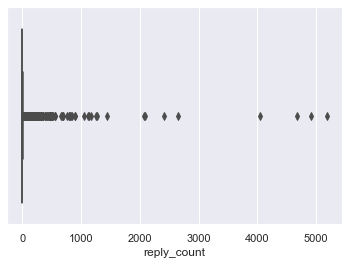

In [23]:
sns.boxplot(x="reply_count",data=df)

In [24]:
print("Exclude the Outliers = ",df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name])
df[col_name] = df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name]

Exclude the Outliers =  0         0
2         0
4         0
6         0
7         0
         ..
219289    0
219290    1
219291    0
219292    1
219293    0
Name: reply_count, Length: 204288, dtype: int64


In [25]:
print("Change the outliers with median ",df[col_name].median())
df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

Change the outliers with median  0.0


<AxesSubplot:ylabel='reply_count'>

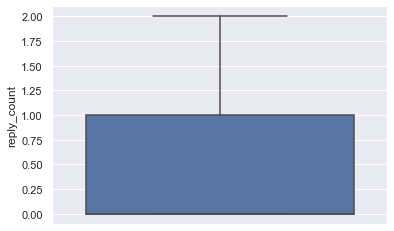

In [26]:
sns.boxplot(y="reply_count",data=df)

# Explore_Data

In [27]:
df.shape

(219294, 7)

In [28]:
df.index

RangeIndex(start=0, stop=219294, step=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tweet_id       219294 non-null  int64  
 1   created_at     219294 non-null  object 
 2   like_count     219294 non-null  int64  
 3   quote_count    219294 non-null  int64  
 4   reply_count    204288 non-null  float64
 5   retweet_count  219294 non-null  int64  
 6   tweet          219294 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.7+ MB


In [30]:
df.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count
count,2.192940e+05,219294.000000,219294.000000,204288.000000,219294.000000
mean,1.602573e+18,16.827423,0.403253,0.324708,2.296725
std,3.020435e+15,487.831192,14.095652,0.578431,63.453391
min,1.598014e+18,0.000000,0.000000,0.000000,0.000000
25%,1.600097e+18,0.000000,0.000000,0.000000,0.000000
50%,1.601765e+18,1.000000,0.000000,0.000000,0.000000
75%,1.604881e+18,3.000000,0.000000,1.000000,0.000000
max,1.609339e+18,119321.000000,4598.000000,2.000000,10593.000000


In [31]:
df.count()

tweet_id         219294
created_at       219294
like_count       219294
quote_count      219294
reply_count      204288
retweet_count    219294
tweet            219294
dtype: int64

In [32]:
df.dtypes

tweet_id           int64
created_at        object
like_count         int64
quote_count        int64
reply_count      float64
retweet_count      int64
tweet             object
dtype: object

# Analysis

In [33]:
df.columns

Index(['tweet_id', 'created_at', 'like_count', 'quote_count', 'reply_count',
       'retweet_count', 'tweet'],
      dtype='object')

In [34]:
df["like_count"].value_counts()

0       99158
1       41672
2       20175
3       11556
4        7560
        ...  
1206        1
1462        1
4533        1
567         1
1791        1
Name: like_count, Length: 1135, dtype: int64

In [35]:
df["like_count"].nunique()

1135

In [36]:
df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0.0,0,ChatGPT: Optimizing Language Models for Dialog...
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,NaN,3252,"Try talking with ChatGPT, our new AI system wh..."
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0.0,1,ChatGPT: Optimizing Language Models for Dialog...
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,NaN,66,"THRILLED to share that ChatGPT, our new model ..."
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0.0,0,"As of 2 minutes ago, @OpenAI released their ne..."


In [37]:
df["tweet"].nunique()

217624

In [38]:
df["like_count"].max()

119321

In [42]:
df[df["like_count"]==119321]

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet
77988,1600712751550431232,2022-12-08 04:43:54+00:00,119321,580,NaN,7051,Time it took to reach 1 million users:\n\nNetf...


In [43]:
df["like_count"].min()

0

In [44]:
df[df["like_count"]==0]

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet
11,1598016664028708887,2022-11-30 18:10:37+00:00,0,0,0.0,0,OpenAI ChatGPT: Optimizing Language Models for...
12,1598016760719999018,2022-11-30 18:11:00+00:00,0,0,0.0,0,ChatGPT: Optimizing Language Models for Dialog...
14,1598016935425462272,2022-11-30 18:11:41+00:00,0,0,0.0,0,OpenAI ChatGPT: Optimizing Language Models for...
15,1598017056506511380,2022-11-30 18:12:10+00:00,0,0,0.0,0,#AI #techforgood ChatGPT: Optimizing Language ...
16,1598017059769679897,2022-11-30 18:12:11+00:00,0,0,0.0,0,#Technical ChatGPT: Optimizing Language Models...
...,...,...,...,...,...,...,...
219279,1609336726635282432,2022-12-31 23:52:30+00:00,0,0,0.0,0,Does ChatGPT mean robots are coming for skille...
219281,1609337115774533632,2022-12-31 23:54:03+00:00,0,0,0.0,0,ChatGPT is banned on Stack Overflow until furt...
219286,1609337987808075776,2022-12-31 23:57:31+00:00,0,0,0.0,0,There's now an open source alternative to Chat...
219289,1609338385864478720,2022-12-31 23:59:05+00:00,0,0,0.0,0,Other Software Projects Are Now Trying to Repl...


In [45]:
(df["like_count"]==0).sum()

99158

In [48]:
df["like_count"].mean()

16.827423458918165

In [49]:
df.columns

Index(['tweet_id', 'created_at', 'like_count', 'quote_count', 'reply_count',
       'retweet_count', 'tweet'],
      dtype='object')

In [50]:
df["retweet_count"].max()

10593

In [51]:
df[df["retweet_count"]==10593]

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet
28314,1599455273323679744,2022-12-04 17:27:08+00:00,11461,731,NaN,10593,We asked Open AI's #ChatGPT what it thought of...


In [52]:
df.isna().sum()

tweet_id             0
created_at           0
like_count           0
quote_count          0
reply_count      15006
retweet_count        0
tweet                0
dtype: int64

In [53]:
df["reply_count"].fillna(0,inplace=True)

In [54]:
df.isna().sum()

tweet_id         0
created_at       0
like_count       0
quote_count      0
reply_count      0
retweet_count    0
tweet            0
dtype: int64

In [56]:
df["retweet_count"].min()

0

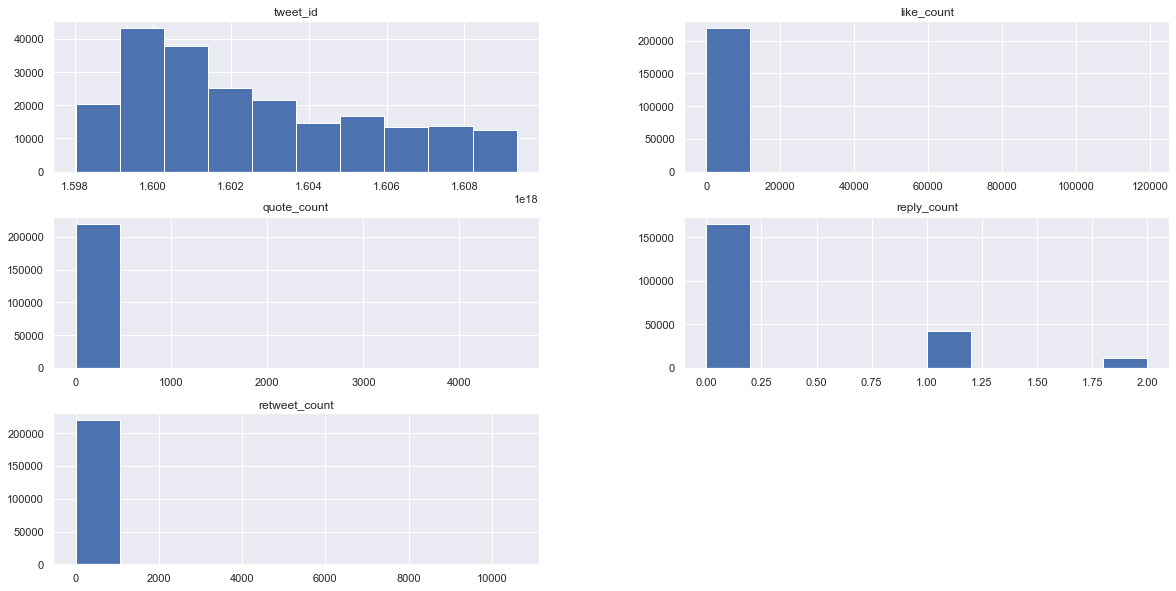

In [57]:
df.hist(figsize=(20,10))
plt.show()

In [58]:
cor=df.corr()
cor

,tweet_id,like_count,quote_count,reply_count,retweet_count
tweet_id,1.000000,-0.008449,-0.008000,-0.069001,-0.005238
like_count,-0.008449,1.000000,0.535067,-0.011436,0.824771
quote_count,-0.008000,0.535067,1.000000,-0.008757,0.629520
reply_count,-0.069001,-0.011436,-0.008757,1.000000,-0.012063
retweet_count,-0.005238,0.824771,0.629520,-0.012063,1.000000


<AxesSubplot:>

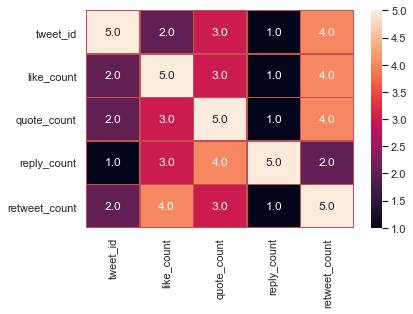

In [59]:
sns.heatmap(cor.rank(axis="columns"),annot=True,fmt=".1f",linewidths=.5,linecolor="r")

In [60]:
df.to_csv("CHATGPT.csv")